# Lecture 2.2 Structured Types

* So far, we have seen three types of objects: ```int```, ```float```, and ```str```. 
 * ```int``` and ```float``` are scalar types.
 * ```str``` can be thought of as a structured, or non-scalar, type (we can use indexing and slicing to extract substrings). <br>
<br>
* Today we introduce four other types of structured objects: ```tuple```, ```list```, ```dict```, and ```set```. 

## 2.2.1. Tuples

* Like strings, tuples are ordered sequences of elements. <br>
<br>
* The difference is that the elements of a tuple need not be characters. 
 * The individual elements can be of any type, and need not be of the same type as each other. <br>
<br>
* Literals of type tuple are written by enclosing a comma-separated list of elements within **parentheses**.

In [1]:
t1 = ()
t2 = (1, 'two', 3)
print(t1)
print(t2)

()
(1, 'two', 3)


* How to denote a singleton tuple?

In [2]:
type((1))

int

In [3]:
type((1,))  # Almost everybody who uses Python has at one time accidentally omitted that annoying comma.

tuple

### Tuples can be concatenated, indexed, and sliced.

In [4]:
t1 = (1, 'two', 3)
t2 = (t1, 3.25)    # a tuple contains another tuple
print(t2)

((1, 'two', 3), 3.25)


In [5]:
print(t1 + t2)         # concatenate t1 and t2
print((t1 + t2)[3])    # indexing
print((t1 + t2)[3][2])    # indexing
print((t1 + t2)[2:5])  # slicing

(1, 'two', 3, (1, 'two', 3), 3.25)
(1, 'two', 3)
3
(3, (1, 'two', 3), 3.25)


### A ```for``` statement can be used to iterate over the elements of a tuple.

In [6]:
for element in (t1+t2):
    print(element)

1
two
3
(1, 'two', 3)
3.25


### Sequences and Multiple Assignment

* If you know the length of a sequence (e.g., a tuple or a string), it can be convenient to use Python’s multiple assignment statement to extract the individual elements.

In [7]:
x, y = (3, 4)
print("x =", x)
print("y =", y)

x = 3
y = 4


In [8]:
a, b, c = 'xyz'
print("a =", a)
print("b =", b)
print("c =", c)

a = x
b = y
c = z


### One more tuple example

In [9]:
def findExtremeDivisors(n1, n2):
    """Assumes that n1 and n2 are positive ints
       Returns a tuple containing the smallest common
       divisor > 1 and the largest common divisor of n1 and n2"""
    divisors = () #the empty tuple
    minVal, maxVal = None, None
    for i in range(2, min(n1, n2) + 1):
        if n1%i == 0 and n2%i == 0:
            if minVal == None or i < minVal:
                minVal = i
            if maxVal == None or i > maxVal:
                maxVal = i
    return (minVal, maxVal)


In [10]:
minDivisor, maxDivisor = findExtremeDivisors(100, 200)
print("The smallest common divisor:", minDivisor)
print("The largest common divisor:", maxDivisor)

The smallest common divisor: 2
The largest common divisor: 100


---

## 2.2.2 Lists and Mutability

* The syntax for expressing literals of type list is similar to that used for tuples.
 * The difference is that we use **square brackets** rather than parentheses. 
 * The empty list is written as ```[]```, and singleton lists are written **without that comma** before the closing bracket.

In [11]:
L = ['I did it all', 4, 'love']
for i in range(len(L)):
    print(L[i])

I did it all
4
love


* Lists differ from tuples in one hugely important way: lists are **mutable**. <br>
<br>
* In contrast, tuples and strings are **immutable**. 
 * Objects of immutable types cannot be modified. <br>
<br>
* In contrast, objects of type list can be modified after they are created. 

In [12]:
L = ['I did it all', 4, 'love']
L[1] = 3.0
print(L)

['I did it all', 3.0, 'love']


In [13]:
t1 = ('I did it all', 4, 'love')
t1[1] = 3.0

TypeError: 'tuple' object does not support item assignment

### Mutating an object vs Assigning an object to a variable

*In Python a variable is merely a name, i.e., a label that can be attached to an object.*

In [14]:
Techs = ['MIT', 'Caltech']
Ivys = ['Harvard', 'Yale', 'Brown']

In [15]:
Univs = [Techs, Ivys]
Univs1 = [['MIT', 'Caltech'], ['Harvard', 'Yale', 'Brown']]

In [16]:
print('Univs =', Univs)
print('Univs1 =', Univs1)
print(Univs == Univs1)

Univs = [['MIT', 'Caltech'], ['Harvard', 'Yale', 'Brown']]
Univs1 = [['MIT', 'Caltech'], ['Harvard', 'Yale', 'Brown']]
True


It appears as if ```Univs``` and ```Univs1``` are bound to the same value. But they are **NOT** the same object. 

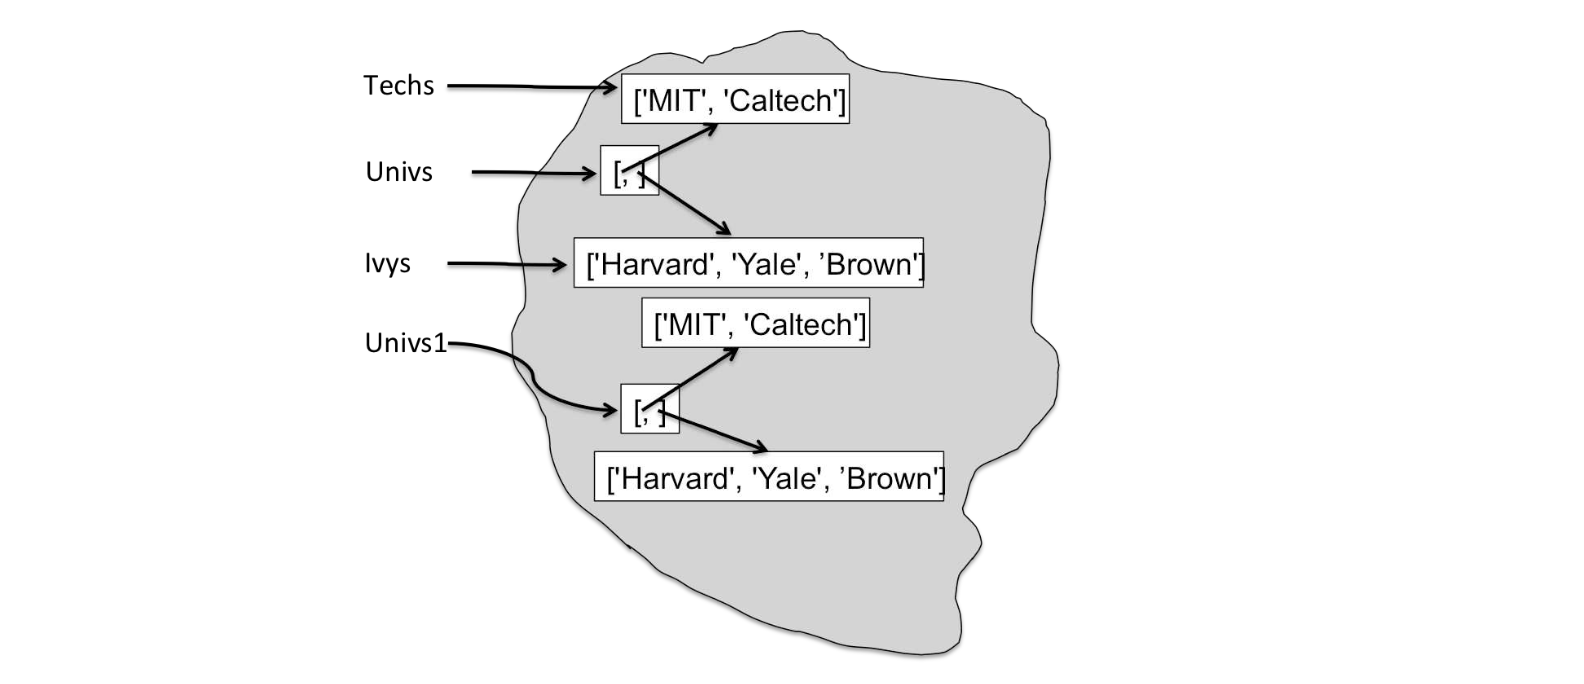

That ```Univs``` and ```Univs1``` are bound to different objects can be verified using the built-in Python function ```id```, which returns a unique integer identifier for an object. This function allows us to test for object equality.

In [17]:
print(Univs == Univs1)  #test value equality
print(id(Univs) == id(Univs1))   #test object equality
print('Id of Univs =', id(Univs))
print('Id of Univs1 =', id(Univs1))

True
False
Id of Univs = 140365722414272
Id of Univs1 = 140365722159552


* Notice that in the above Figure, the elements of ```Univs``` are not copies of the lists to which ```Techs``` and ```Ivys``` are bound, but are rather the lists themselves. <br>
<br>
* The elements of ```Univs1``` are lists that contain the same elements as the lists in ```Univs```, but they are not the same lists. 

In [18]:
print('Ids of Univs[0] and Univs[1]', id(Univs[0]), id(Univs[1]))
print('Ids of Univs1[0] and Univs1[1]', id(Univs1[0]), id(Univs1[1]))

Ids of Univs[0] and Univs[1] 140365722448704 140365722413568
Ids of Univs1[0] and Univs1[1] 140365722368576 140365722114304


### Why does this matter? It matters because lists are *mutable*.

In [19]:
Techs.append('RPI')

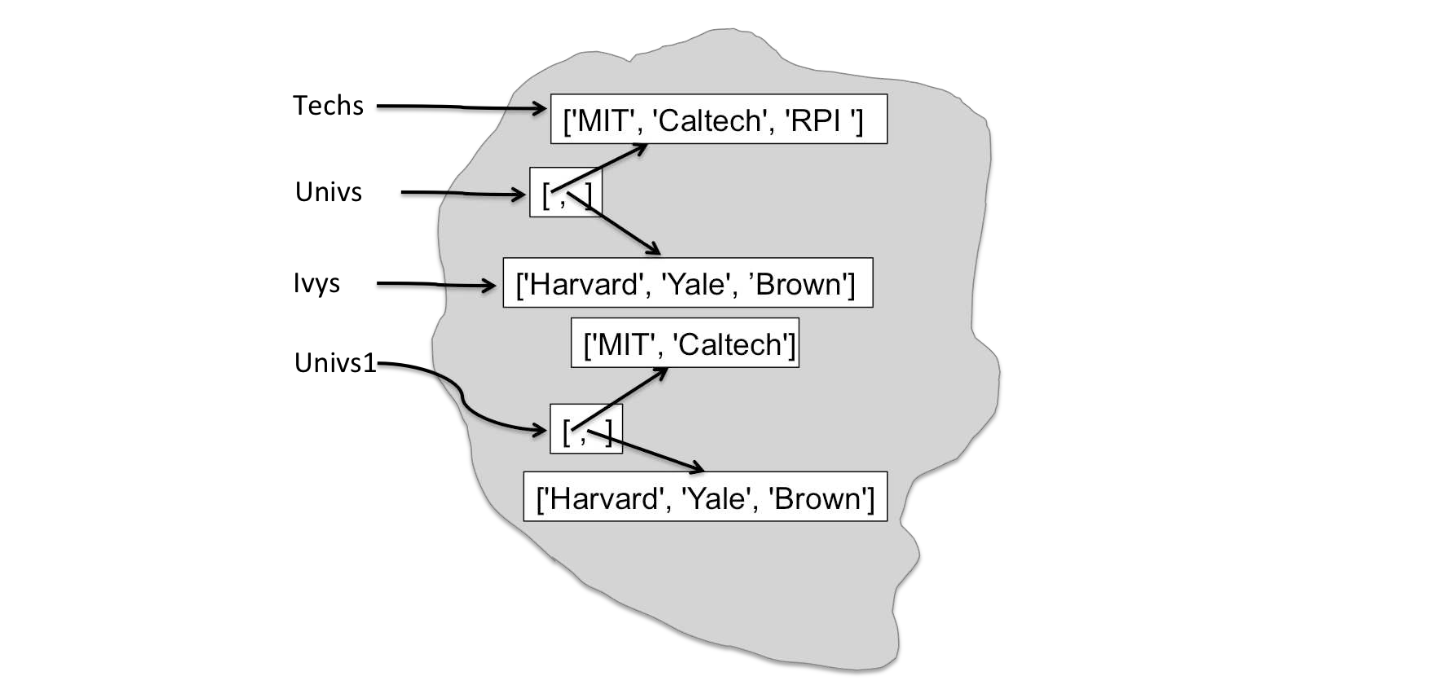

In [20]:
print('Univs =', Univs)
print('Univs1 =', Univs1)

Univs = [['MIT', 'Caltech', 'RPI'], ['Harvard', 'Yale', 'Brown']]
Univs1 = [['MIT', 'Caltech'], ['Harvard', 'Yale', 'Brown']]


Now ```Univs``` and ```Univs1``` have different values. Unintentional mutation can lead to programming errors that are often enormously hard to track down.

#### ```append```:  We can append a list to another list using append as follows:

In [21]:
Techs.append(Ivys)
print(Techs)

['MIT', 'Caltech', 'RPI', ['Harvard', 'Yale', 'Brown']]


* Suppose we do not want to maintain this structure but want to add the elements of one list into another list. 
 * We can do that by ***list concatenation*** or ***extend***.
 * Notice that the operator ```+``` does not have a side effect. It creates a new list and returns it. 
 * In contrast, ```extend``` and ```append``` each mutated L1 .

In [22]:
### list concatenation
L1 = [1,2,3]
L2 = [4,5,6]
L3 = L1 + L2
print('L3 =', L3)

### extend
L1.extend(L2)
print('L1 =', L1)

L1.append(L2)
print('L1 =', L1)

L3 = [1, 2, 3, 4, 5, 6]
L1 = [1, 2, 3, 4, 5, 6]
L1 = [1, 2, 3, 4, 5, 6, [4, 5, 6]]


### Additional list methods:

* ```L.append(e)``` adds the object e to the end of L .
* ```L.count(e)``` returns the number of times that e occurs in L .
* ```L.insert(i, e)``` inserts the object e into L at index i .
* ```L.extend(L1)``` adds the items in list L1 to the end of L .
* ```L.remove(e)``` deletes the first occurrence of e from L .
* ```L.index(e)``` returns the index of the first occurrence of e in L . It raises an exception if e is not in L.
* ```L.pop(i)``` removes and returns the item at index i in L . If i is omitted, it defaults to -1 , to remove and return the last element of L.
* ```L.sort()``` sorts the elements of L in ascending order .
* ```L.reverse()``` reverses the order of the elements in L .


### Cloning

In [23]:
def removeDups(L1, L2):
    """Assumes that L1 and L2 are lists.
       Removes any element from L1 that also occurs in L2"""
    for e1 in L1:
        #print(L1)
        if e1 in L2:
            L1.remove(e1) 
            

In [24]:
L1 = [1,2,3,4]
L2 = [1,2,5,6]
removeDups(L1, L2)

In [25]:
print('L1 =', L1)   # but we expect to see [3,4], what happened? 

L1 = [2, 3, 4]


* One way to avoid this kind of problem is to use slicing to clone (i.e., make a copy of) the list and write ```for e1 in L1[:]```. <br>
<br>
* Notice that writing ```newL1 = L1``` followed by for e1 in newL1 would not have solved the problem. It would not have created a copy of L1 , but would merely have introduced a new name for the existing list.<br>
<br>
* The expression ```list(l)``` returns a copy of the list l. <br>
<br>
* If the list to be copied contains mutable objects that you want to copy as well, import the standard library module copy and use the function ```copy.deepcopy```.

In [26]:
def removeDups(L1, L2):
    """Assumes that L1 and L2 are lists.
       Removes any element from L1 that also occurs in L2"""
    
    L1_copy = list(L1)
    for e1 in L1_copy:
        #print(L1)
        if e1 in L2:
            L1.remove(e1) 
            

In [27]:
L1 = [1,2,3,4]
L2 = [1,2,5,6]
removeDups(L1, L2)
print('L1 =', L1)

L1 = [3, 4]


### List Comprehension

**List comprehension** provides a concise way to apply an operation to the values in a sequence. It creates a new list in which each element is the result of applying a given operation to a value from a sequence

In [28]:
L = [x**2 for x in range(1,7)]
print(L)

[1, 4, 9, 16, 25, 36]


In [29]:
# The for clause in a list comprehension can be followed by one or more if:
mixed = [1, 2, 'a', 3, 4.0]
print([x**2 for x in mixed if type(x) == int])

[1, 4, 9]


## 2.2.3 Strings, Tuples, and Lists

* Strings, Tuples, and Lists are similar in that objects of all of these types can be operated in a similar way as follows: 
 * ```seq[i]``` returns the i th element in the sequence.
 * ```len(seq)``` returns the length of the sequence.
 * ```seq1 + seq2``` returns the ***concatenation*** of the two sequences.
 * ```n * seq``` returns a sequence that repeats seq n times.
 * ```seq[start:end]``` returns a slice of the sequence.
 * ```e in seq``` is True if e is contained in the sequence and False otherwise.
 * ```e not in seq``` is True if e is not in the sequence and False otherwise.
 * ```for e in seq``` iterates over the elements of the sequence.

#### Some of their other similarities and differences are summarized in the following figure

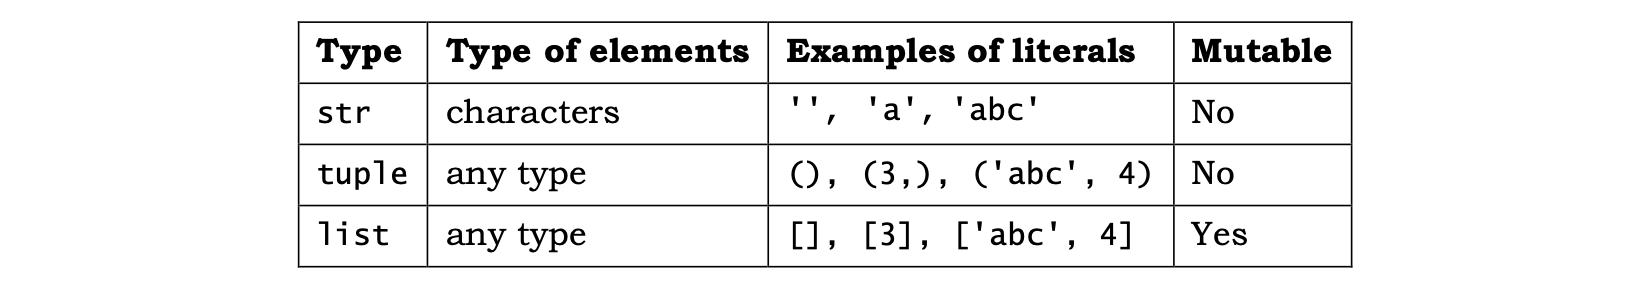

## 2.2.4 Dictionaries

* Objects of type ```dict``` (short for **dictionary**) are like lists except that 
 * “Indices” need not be integers
 * They can be values of any ***immutable*** type. 
 * Since they are not ordered, we call them ***keys*** rather than indices. Think of a dictionary as a set of **key/value pairs**.  <br>
<br>
* Literals of type ```dict``` are enclosed in **curly braces**, and each element is written as a key followed by a **colon** followed by a value.

In [30]:
monthNumbers = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5,
                1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May'}
print('The third month is ' + monthNumbers[3])

The third month is Mar


In [31]:
dist = monthNumbers['Apr'] - monthNumbers['Jan']
print('Apr and Jan are', dist, 'months apart')

Apr and Jan are 3 months apart


* The entries in a ```dict``` are unordered and cannot be accessed with an index. That’s why ```monthNumbers[1]``` unambiguously refers to the entry with the key 1 rather than the second entry.   <br>
<br>
* The method ```keys``` returns a list containing the keys of a dictionary. 
 * The order in which the keys appear is not defined.

In [32]:
print(monthNumbers.keys())

dict_keys(['Jan', 'Feb', 'Mar', 'Apr', 'May', 1, 2, 3, 4, 5])


* When a ```for``` statement is used to iterate over a dictionary, the value assigned to the iteration variable is a key, not a key/value pair.

In [33]:
keys = []
for e in monthNumbers:
    keys.append(e)
print(keys)

['Jan', 'Feb', 'Mar', 'Apr', 'May', 1, 2, 3, 4, 5]


### Example: Translating text using ```dict```

In [34]:
EtoF = {'bread':'pain', 'wine':'vin', 'with':'avec', 'I':'Je',
        'eat':'mange', 'drink':'bois', 'John':'Jean',
        'friends':'amis', 'and': 'et', 'of':'du','red':'rouge'}
FtoE = {'pain':'bread', 'vin':'wine', 'avec':'with', 'Je':'I',
        'mange':'eat', 'bois':'drink', 'Jean':'John',
        'amis':'friends', 'et':'and', 'du':'of', 'rouge':'red'}
dicts = {'English to French':EtoF, 'French to English':FtoE}

In [35]:
def translateWord(word, dictionary):
    if word in dictionary.keys():
        return dictionary[word]
    elif word != '':
        return '"' + word + '"'
    return word

In [36]:
def translate(phrase, dicts, direction):
    UCLetters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    LCLetters = 'abcdefghijklmnopqrstuvwxyz'
    letters = UCLetters + LCLetters
    dictionary = dicts[direction]
    translation = ''
    word = ''
    for c in phrase:
        if c in letters:
            word = word + c
        else:
            translation = translation + translateWord(word, dictionary) + c
            word = ''
    return translation + ' ' + translateWord(word, dictionary)


In [37]:
print(translate('I drink good red wine, and eat bread.', dicts,'English to French'))

Je bois "good" rouge vin, et mange pain. 


In [38]:
print(translate('Je bois du vin rouge.', dicts, 'French to English'))

I drink of wine red. 


### Some common operations on ```dicts```

* ```len(d)``` returns the number of items in d .
* ```d.keys()``` returns a list containing the keys in d .
* ```d.values()``` returns a list containing the values in d .
* ```k in d``` returns True if key k is in d .
* ```d[k]``` returns the item in d with key k .
* ```d.get(k, v)``` returns d[k] if k is in d , and v otherwise.
* ```d[k] = v``` associates the value v with the key k in d . If there is already a value associated with k , that value is replaced.
* ```del d[k]``` removes the key k from d .
* ```for k in d``` iterates over the keys in d.

## 2.2.5 Set

* A **set** is an unordered collection of unique elements. You can think of them like ```dicts```, but keys only, no values. <br>
<br>
* A set can be created in two ways: via the ```set``` function or via a set literal with **curly braces**:

In [39]:
set([2, 2, 2, 1, 3, 3])

{1, 2, 3}

In [40]:
{2, 2, 2, 1, 3, 3}

{1, 2, 3}

* Sets support mathematical set operations like union, intersection, difference, and symmetric difference.

In [41]:
a = {1, 2, 3, 4, 5}
b = {3, 4, 5, 6, 7, 8}

In [42]:
print(a.union(b))
print(a | b )

{1, 2, 3, 4, 5, 6, 7, 8}
{1, 2, 3, 4, 5, 6, 7, 8}


In [43]:
print(a.intersection(b))
print(a & b)

{3, 4, 5}
{3, 4, 5}


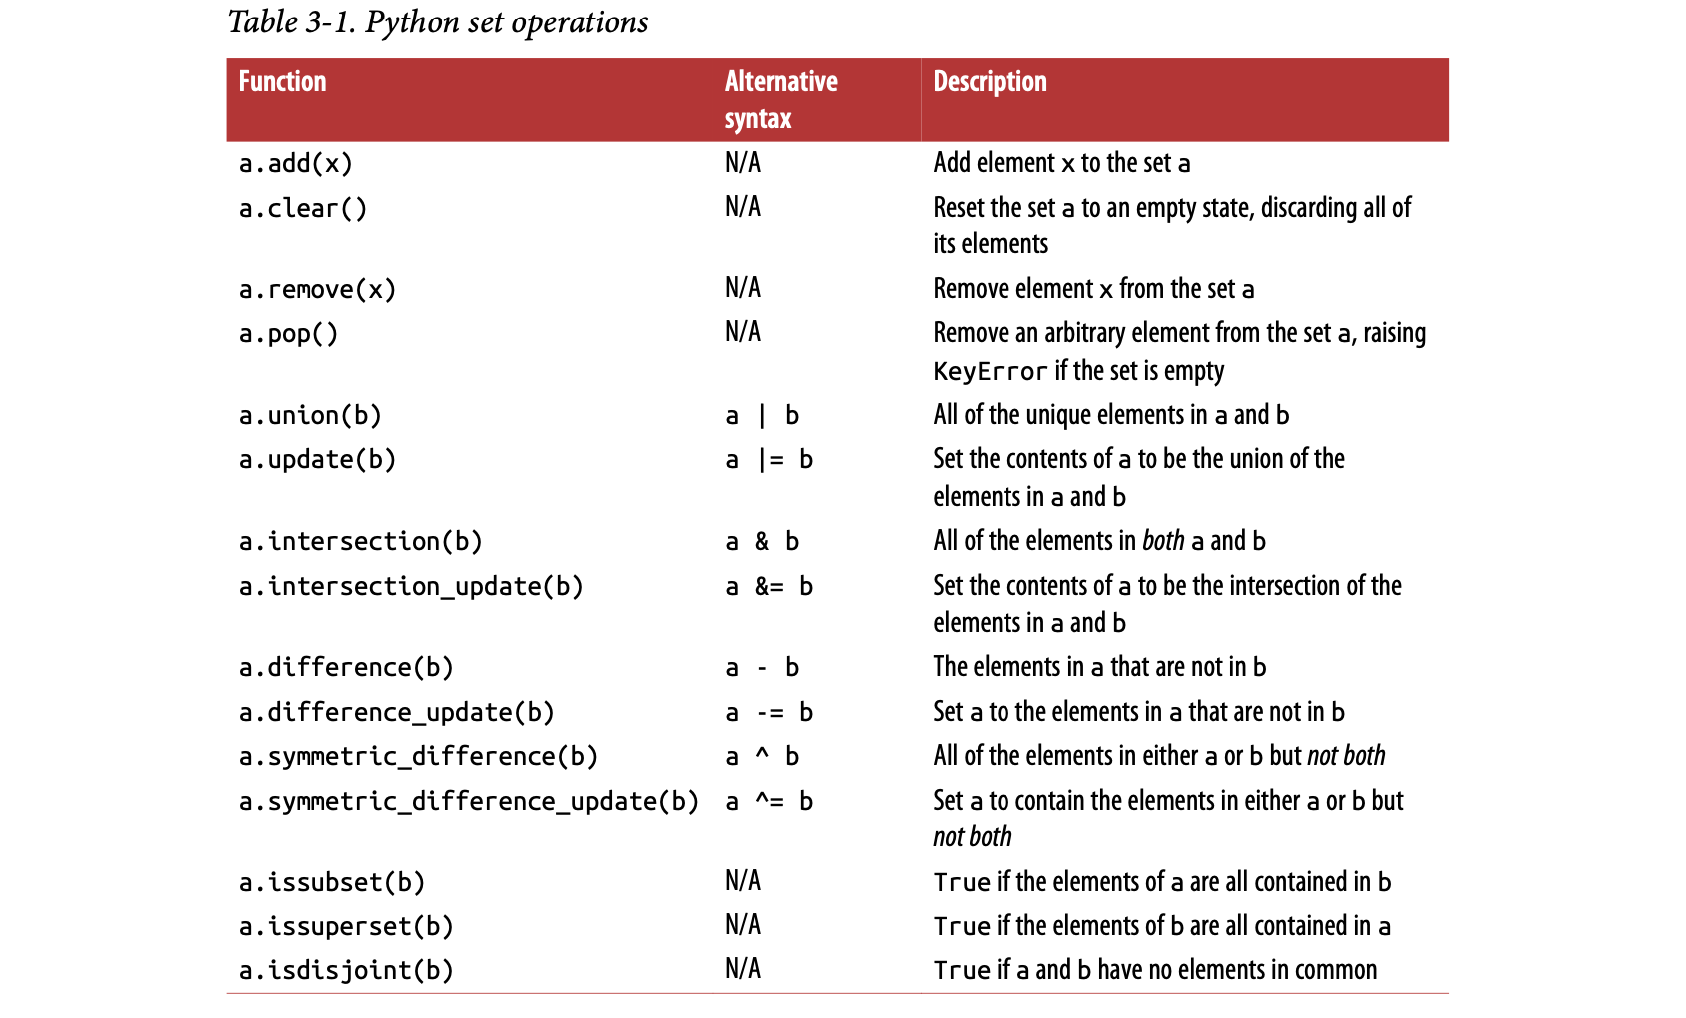

In [44]:
a_set = {1, 2, 3, 4, 5}
{1, 2, 3}.issubset(a_set)

True

In [45]:
a_set.issuperset({1, 2, 3})

True

In [46]:
{1,2,3}=={3,2,1}

True

---

# END